# `einops` Tutorials

`einops` is a powerful library for reshaping and permuting tensors. It is a very useful library for deep learning and computer vision tasks.

# Introduction

## Installation

```
pip install einops
```

# Basics

In [1]:
import sys
from path_utils import add_parent_path_to_sys_path
current_path = sys.path[0]
add_parent_path_to_sys_path(current_path)

import numpy as np
from utils.image_utils import display_numpy_arrays_as_images
display_numpy_arrays_as_images()

Added f:\EverythingFromSctrach\EverythingFromScratch to the sys path.


Read the `einops` images for demonstration purpose.

In [2]:
imgs = np.load('../../data/einops/test_images.npy', allow_pickle=False)
print(imgs.shape, imgs.dtype)

(6, 96, 96, 3) float64


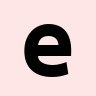

In [8]:
imgs[0]

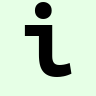

In [9]:
imgs[1]

In [10]:
# Main three operations in einops
from einops import rearrange, reduce, repeat

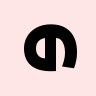

In [12]:
# Rearrange operation rearranges eleemnts of an array
# For example, we can swap the height and width of the image:
# (switch the first and second axes)
# a.k.a. transpose
rearrange(imgs[0], 'h w c -> w h c')

## `rearrange`

### Composition of Axes

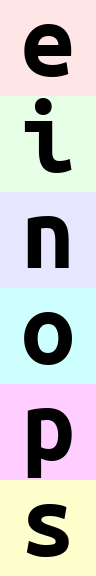

In [14]:
# We can also compose batch and height to a new height axis,
# by collapsing to 3D tensor:
rearrange(imgs,
          'b h w c -> (b h) w c')

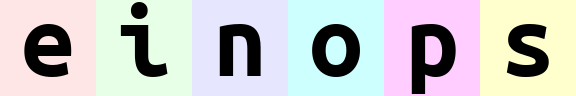

In [15]:
# We can also compose batch and width
rearrange(imgs,
          'b h w c -> h (b w) c')

In [16]:
# The length of newly composed axis is a product of components
# [batch, height, width, channel] -> [height, (batch * width), channel]
# [  6  ,   96  ,  96  ,    3   ] -> [  96  , (  6   *   96 ),    3   ]
rearrange(imgs,
          'b h w c -> h (b w) c').shape

(96, 576, 3)

In [17]:
# To flatten 4D tensor into 1D,
# we can compose all axes into a single axis
rearrange(imgs,
          'b h w c -> (b h w c)').shape

(165888,)

### Decomposition of Axes

Decomposition is the reverse of composition. It is the process of splitting a single axis into multiple axes.

In [18]:
# We can decompose the first axis into two axes
rearrange(imgs,
          '(b1 b2) h w c -> b1 b2 h w c',
          b1=2).shape

(2, 3, 96, 96, 3)

The argument `b1=2` indicates that the first split axis has a size of 2 so the second split axis will have a size of 3, which completes the original axis of size 6.

We can also combine composition and decomposition:

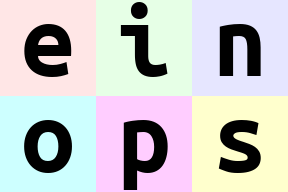

In [19]:
rearrange(imgs,
          '(b1 b2) h w c -> (b1 h) (b2 w) c',
          b1=2)

Hence the height axis is multiplied by 2 and the width axis is multiplied by 3. The order direction goes horizontally first and then vertically.

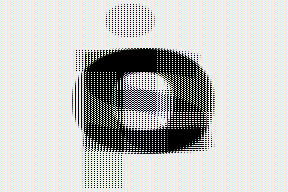

In [20]:
rearrange(imgs,
          '(b1 b2) h w c -> (h b1) (w b2) c',
          b1=2)

We cannot switch the order of the axes in this case. Remember to always keep the original order of the axes.

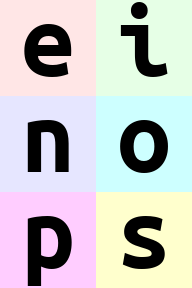

In [21]:
rearrange(imgs,
          '(b1 b2) h w c -> (b1 h) (b2 w) c',
          b1=3)

The order direction still goes horizontally first, but the height axis is multiplied by 3 and the width axis is multiplied by 2.

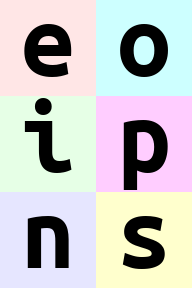

In [24]:
# slightly different composition:
# We merge b1 with w, and b2 with h
rearrange(imgs,
          '(b1 b2) h w c -> (b2 h) (b1 w) c',
          b1=2)

NOW the letters are ordered vertically first and then horizontally, because `b1` is composed with `w`.

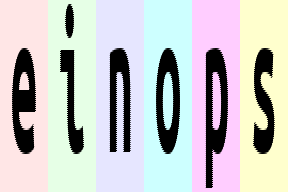

In [25]:
# We can also merge part of width dimension to height.
# This is called "width-to-height" operation.
# Basically, we shrink the width and expand the height.
rearrange(imgs,
          'b h (w1 w2) c -> (h w2) (b w1) c',
          w2=2)

In [30]:
rearrange(imgs,
          'b h (w1 w2) c -> (h w2) (b w1) c',
          w2=2).shape

(192, 288, 3)

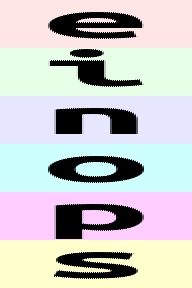

In [39]:
# height-to-width operation
rearrange(imgs,
          'b (h1 h2) w c -> (b h1) (w h2) c',
          h2=2)

In [40]:
rearrange(imgs,
          'b (h1 h2) w c -> (b h1) (w h2) c',
          h2=2).shape

(288, 192, 3)

### Order of Axes

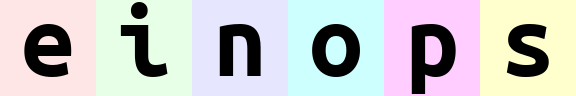

In [41]:
# We knew we can merge batch and width
rearrange(imgs,
          'b h w c -> h (b w) c')

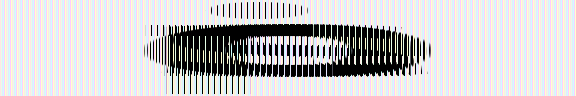

In [42]:
# If we switch the order of b and w, the result is different
rearrange(imgs,
          'b h w c -> h (w b) c')

**The order of axes in composition matters!**

For digits in the number, the leftmost digit is the most significant, while neighboring numbers differ in the rightmost axis.

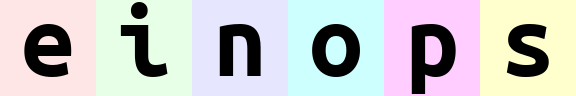

In [43]:
rearrange(imgs,
          '(b1 b2) h w c -> h (b1 b2 w) c',
          b1=2) # (2 * 3 * 96)

Switching `b1` with `b2` looks like a lexicographic sort.

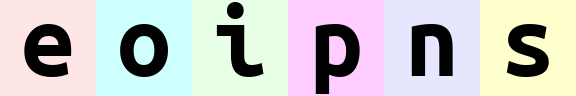

In [47]:
rearrange(imgs,
          '(b1 b2) h w c -> h (b2 b1 w) c',
          b1=2) # (3 * 2 * 96)

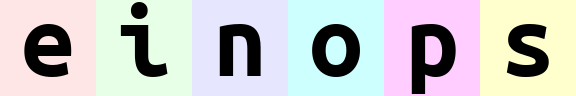

In [49]:
rearrange(imgs,
          '(b1 b2) h w c -> h (b1 b2 w) c',
          b1=3)

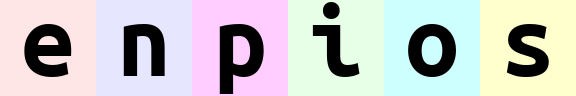

In [48]:
rearrange(imgs,
          '(b1 b2) h w c -> h (b2 b1 w) c',
          b1=3)

### Stack and Concatenate

In [78]:
imgs_list = [imgs_i for imgs_i in imgs]
print(f'Object {type(imgs_list)} has {len(imgs_list)} tensors of shape {imgs_list[0].shape} as {type(imgs_list[0])}')

Object <class 'list'> has 6 tensors of shape (96, 96, 3) as <class 'numpy.ndarray'>


In [81]:
# We can stack the list of tensors into a single tensor
imgs_stack = rearrange(imgs_list,
                       'b h w c -> b h w c')
imgs_stack.shape, type(imgs_stack)

((6, 96, 96, 3), numpy.ndarray)

In [83]:
# This is equivalent to numpy stacking, but more explicit
np.array_equal(imgs_stack, np.stack(imgs_list, axis=0))

True

In [82]:
# we can also swtich the order of the axes
rearrange(imgs_list,
          'b h w c -> h w c b').shape

(96, 96, 3, 6)

In [84]:
# We can concatenate along axes
imgs_concat = rearrange(imgs_list,
                        'b h w c -> h (b w) c')
# here, we concatenate along the width axis
imgs_concat.shape

(96, 576, 3)

In [85]:
# This is equivalent to numpy concatenation
np.array_equal(imgs_concat, np.concatenate(imgs_list, axis=1))

True

### Addition or Removal of Axes

Using `1` as the size of the axis, we can add or remove axes.

In [86]:
# adding axes
imgs_6d = rearrange(imgs,
                    'b h w c -> b 1 h w 1 c')
imgs_6d.shape

(6, 1, 96, 96, 1, 3)

In [87]:
# removing axes
rearrange(imgs_6d,
          'b 1 h w 1 c -> b h w c').shape

(6, 96, 96, 3)

We can also use `()`, which is a composition of zero axes and has a unit length.

In [88]:
reduce(imgs,
       'b h w c -> b () () c',
       'max').shape

(6, 1, 1, 3)

## `reduce`

In `einops`, `reduce` is used to aggregate the values of an axis. We need to write out what the operation does to the axis.

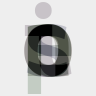

In [50]:
# average over batch
reduce(imgs,
       'b h w c -> h w c',
       'mean')

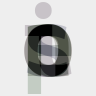

In [52]:
# This is excatly the same as the following but more reabable
imgs.mean(axis=0)

In [53]:
# average over height
reduce(imgs,
       'b h w c -> b w c',
       'mean')

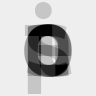

In [56]:
# average over channel and batch
reduce(imgs,
       'b h w c -> h w',
       'mean')

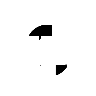

In [58]:
# Other reduction methods are
# 'sum', 'max', 'min', 'prod', 'mean', 'any', 'all'
reduce(imgs,
       'b h w c -> h w',
       'sum')

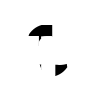

In [59]:
reduce(imgs,
       'b h w c -> h w',
       'max')

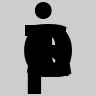

In [60]:
reduce(imgs,
       'b h w c -> h w',
       'min')

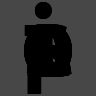

In [61]:
reduce(imgs,
       'b h w c -> h w',
       'prod')

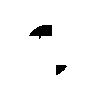

In [62]:
reduce(imgs,
       'b h w c -> h w',
       'any')

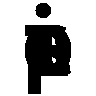

In [63]:
reduce(imgs,
       'b h w c -> h w',
       'all')

### mean-pooling

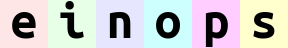

In [64]:
# images are split into 2x2 patches, each patch is averaged
reduce(imgs,
       'b (h h2) (w w2) c -> h (b w) c',
       'mean',
       h2=2,
       w2=2)

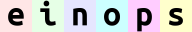

In [65]:
# images are split into 3x3 patches, each patch is averaged
reduce(imgs,
       'b (h h2) (w w2) c -> h (b w) c',
       'mean',
       h2=3,
       w2=3)

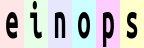

In [66]:
# images are split into 2x4 patches, each patch is averaged
reduce(imgs,
       'b (h h2) (w w2) c -> h (b w) c',
       'mean',
       h2=2,
       w2=4)

### max-pooling

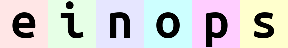

In [67]:
# images are split into 2x2 patches
reduce(imgs,
       'b (h h2) (w w2) c -> h (b w) c',
       'max',
       h2=2,
       w2=2)

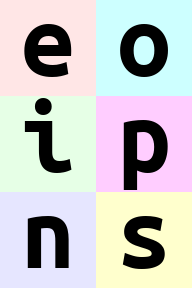

In [68]:
reduce(imgs,
       '(b1 b2) h w c -> (b2 h) (b1 w) c',
       'mean',
       b1=2)

In [69]:
reduce(imgs,
       '(b1 b2) h w c -> (b2 h) (b1 w) c',
       'mean',
       b1=2).shape

(288, 192, 3)

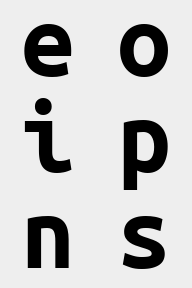

In [70]:
reduce(imgs,
       '(b1 b2) h w c -> (b2 h) (b1 w)',
       'mean',
       b1=2)

In [71]:
reduce(imgs,
       '(b1 b2) h w c -> (b2 h) (b1 w)',
       'mean',
       b1=2).shape

(288, 192)

## `repeat`

In [91]:
# repeat along a new axis
repeat(imgs[0],
       'h w c -> h new_axis w c',
       new_axis=20).shape

(96, 20, 96, 3)

In [92]:
# this is equivalent to
repeat(imgs[0],
       'h w c -> h 20 w c').shape

(96, 20, 96, 3)

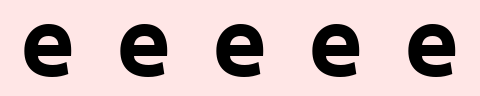

In [93]:
# repeat along an existing axis
repeat(imgs[0],
       'h w c -> h (repeat w) c',
       repeat=5)

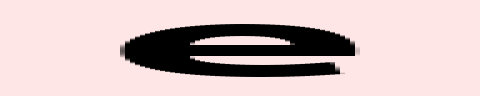

In [94]:
# AGAIN, order matters
# (repeat w) means repeat along the width axis
# (w repeat) means repeat each pixel consecutively `repeat` times
repeat(imgs[0],
       'h w c -> h (w repeat) c',
       repeat=5)

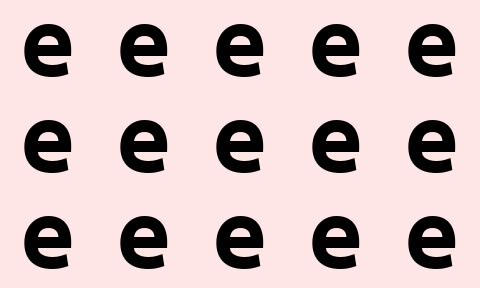

In [96]:
# repeat along two existing axes
repeat(imgs[0],
       'h w c -> (3 h) (5 w) c')

In [97]:
# repeat and reduce are inverse operations
repeated = repeat(imgs,
                  'b h w c -> b h new_axis w c', new_axis=3)
reduced = reduce(repeated,
                 'b h new_axis w c -> b h w c',
                 'min')
np.array_equal(reduced, imgs)

True

## Fancy Examples

* Interweaving pixels of different pictures

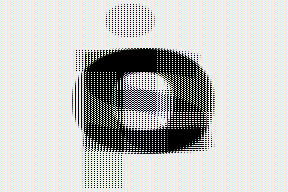

In [98]:
# all letters are observable
rearrange(imgs,
          '(b1 b2) h w c -> (h b1) (w b2) c',
          b1=2)

* Interweaving along vertical axis across multiple images

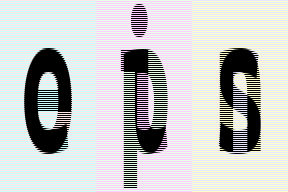

In [99]:
rearrange(imgs,
          '(b1 b2) h w c -> (h b1) (b2 w) c',
          b1=2)

* Interweaving lines across multiple images

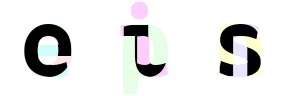

In [100]:
reduce(imgs,
       '(b1 b2) h w c -> h (b2 w) c',
       'max',
       b1=2)

* Composing RGB channels into dimensions

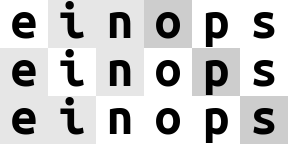

In [101]:
reduce(imgs,
       'b (h 2) (w 2) c -> (c h) (b w)', # images are also downsampled by 2
       'mean')

* Resizing disproportionately

In [102]:
# average over channel and
# downsample the height by 4 and width by 3
reduce(imgs,
       'b (h 4) (w 3) c -> h (b w)',
       'mean')

* Splitting each image in two halves horizontally, and averaging the halves over the channel

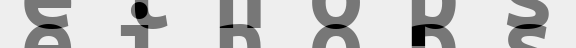

In [103]:
reduce(imgs,
       'b (h1 h2) w c -> h2 (b w)',
       'mean',
       h1=2)

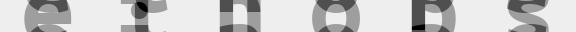

In [105]:
# splitting into 3 pieces
reduce(imgs,
       'b (h1 h2) w c -> h2 (b w)',
       'mean',
       h1=3)

* Splitting in small patches and transposing each patch

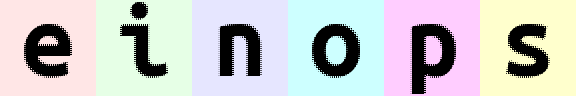

In [114]:
rearrange(imgs,
          'b (h1 h2) (w1 w2) c -> (h1 w2) (b w1 h2) c',
          h2=2,
          w2=2)

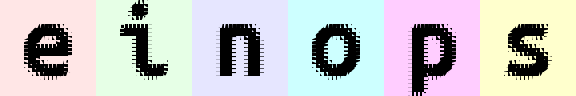

In [115]:
rearrange(imgs,
          'b (h1 h2) (w1 w2) c -> (h1 w2) (b w1 h2) c',
          h2=4,
          w2=4)

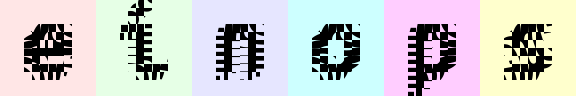

In [116]:
rearrange(imgs,
          'b (h1 h2) (w1 w2) c -> (h1 w2) (b w1 h2) c',
          h2=8,
          w2=8)

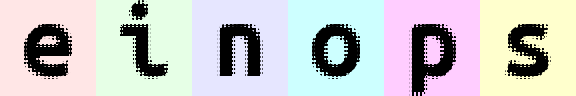

In [118]:
rearrange(imgs, 
          'b (h1 h2 h3) (w1 w2 w3) c -> (h1 w2 h3) (b w1 h2 w3) c', 
          h2=2, 
          w2=2, 
          w3=2, 
          h3=2)

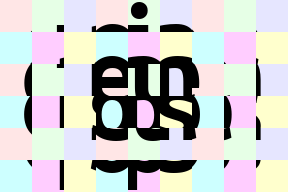

In [119]:
rearrange(imgs, 
          '(b1 b2) (h1 h2) (w1 w2) c -> (h1 b1 h2) (w1 b2 w2) c', 
          h1=3, 
          w1=3, 
          b2=3)

* Really complicated patterns

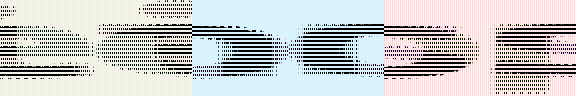

In [120]:
reduce(imgs,
       '(b1 b2) (h1 h2 h3) (w1 w2 w3) c -> (h1 w1 h3) (b1 w2 h2 w3 b2) c',
       'mean',
       h2=2,
       w1=2,
       w3=2,
       h3=2,
       b2=2)

* Subtracting background in each image invididually and normalizing the result
  * Notice the `()` in the composition of the axes. It is composition of 0 axis, a dummy axis with 1 element.

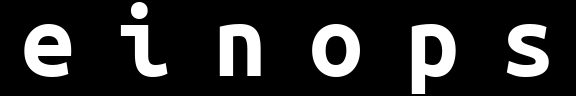

In [121]:
# subtract background
imgs2 = reduce(imgs,
              'b h w c -> b () () c',
              'max')
imgs2 = imgs2 - imgs
# normalize
imgs2 = imgs2 / reduce(imgs2,
                       'b h w c -> b () () c',
                       'max')

rearrange(imgs2,
          'b h w c -> h (b w) c')

* Pixelating: first downsacle by averaging, and then upscale back using the same pattern

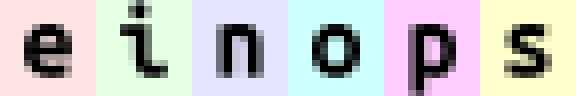

In [122]:
averaged = reduce(imgs,
                  'b (h h2) (w w2) c -> b h w c',
                  'mean',
                  h2=6,
                  w2=8)

repeat(averaged,
       'b h w c -> (h h2) (b w w2) c',
       h2=6,
       w2=8)

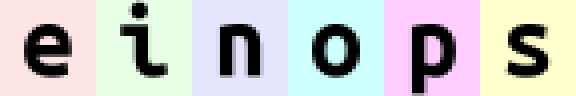

In [123]:
h2 = 3
w2 = 4
averaged = reduce(imgs,
                  'b (h h2) (w w2) c -> b h w c',
                  'mean',
                  h2=h2,
                  w2=w2)

repeat(averaged,
       'b h w c -> (h h2) (b w w2) c',
       h2=h2,
       w2=w2)

* Diaglonalizing the image

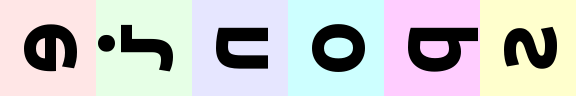

In [124]:
rearrange(imgs,
          'b h w c -> w (b h) c')

* Bringing color channel to the front

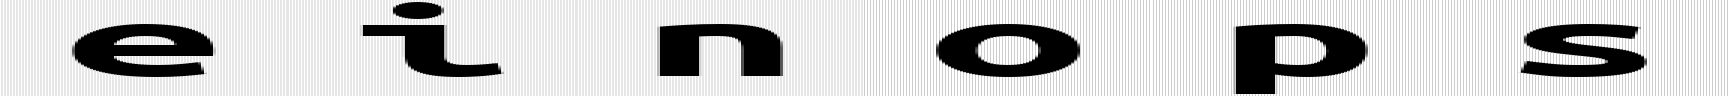

In [125]:
rearrange(imgs,
          'b h w c -> h (b w c)')

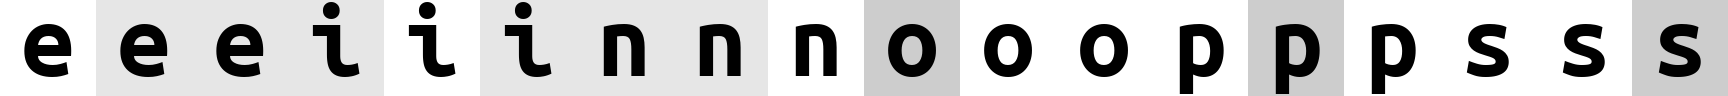

In [127]:
# This will list every channel image
rearrange(imgs,
          'b h w c -> h (b c w)')

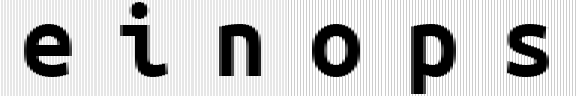

In [128]:
# To keep the original image size,
# we need to downsample the width by 3
reduce(imgs,
       'b h (w w2) c -> h (b w c)',
       'mean',
       w2=3)

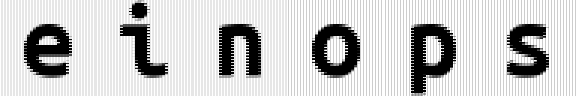

In [129]:
reduce(imgs, 
       'b (h h2) (w w2) c -> (h w2) (b w c)', 
       'mean', 
       h2=3, 
       w2=3)

## Summary

* `rearrange` does NOT change number of elements and covers different numpy functions.
* `reduce` combines same reordering syntax with reductions.
* `repeat` covers repeating and tiling.

# Deep Learning Framework Adaptation

In [1]:
import sys
from path_utils import add_parent_path_to_sys_path
current_path = sys.path[0]
add_parent_path_to_sys_path(current_path)

from einops import reduce, rearrange
import numpy as np
x = np.random.RandomState(101).normal(size=[12, 48, 100, 200])

# select a deep learning framework
flavor = 'pytorch' # 'pytorch', 'tensorflow', 'chainer'

print(f'Selected {flavor} backend')
if flavor == 'tensorflow':
    import tensorflow as tf
    tape = tf.GradientTape(persistent=True)
    tape.__enter__()
    
    x = tf.Variable(x) + 0
elif flavor == 'pytorch':
    import torch
    x = torch.from_numpy(x)
    x.requires_grad = True
else:
    assert flavor == 'chainer'
    import chainer
    x = chainer.Variable(x)

Added f:\EverythingFromSctrach\EverythingFromScratch to the sys path.
Selected pytorch backend


In [2]:
type(x), x.shape

(torch.Tensor, torch.Size([12, 48, 100, 200]))

## Common Operations

In [3]:
# When plotting, we need to move the channel axis to the last
y = rearrange(x,
              'b c h w -> b h w c')
type(y), y.shape

(torch.Tensor, torch.Size([12, 100, 200, 48]))

The `rearrange` operation does not change the object type.

### Backpropagation

In [4]:
y0 = x
y1 = reduce(y0,
            'b c h w -> b c',
            'max') # max over height and width
y2 = rearrange(y1,
               'b c -> c b') # move the batch axis to the last
y3 = reduce(y2,
            'c b -> ',
            'sum') # sum over batch

if flavor == 'tensorflow':
    print(reduce(tape.gradient(y3, x),
                 'b c h w ->',
                 'sum'))
else:
    y3.backward()
    print(reduce(x.grad,
                 'b c h w ->',
                 'sum'))

tensor(576., dtype=torch.float64)


### `einops.asnumpy`

In [5]:
# convert tensors to numpy arrays
# and pull from gpu if necessary
from einops import asnumpy

y3_np = asnumpy(y3)

type(y3_np)

numpy.ndarray

## Common Layers

* Flattening

In [6]:
y = rearrange(x,
              'b c h w -> b (c h w)')
y.shape

torch.Size([12, 960000])

* Space-to-depth

In [8]:
y = rearrange(x,
              'b c (h h1) (w w1) -> b (h1 w1 c) h w',
              h1=2,
              w1=2)
y.shape, x.shape

(torch.Size([12, 192, 50, 100]), torch.Size([12, 48, 100, 200]))

* Depth-to-space

In [9]:
y = rearrange(x,
              'b (h1 w1 c) h w -> b c (h h1) (w w1)',
              h1=2,
              w1=2)
y.shape, x.shape

(torch.Size([12, 12, 200, 400]), torch.Size([12, 48, 100, 200]))

* Global average pooling

In [10]:
y = reduce(x,
           'b c h w -> b c',
           reduction='mean')
y.shape, x.shape

(torch.Size([12, 48]), torch.Size([12, 48, 100, 200]))

* Max pooling with a kernel 2x2

In [12]:
y = reduce(x,
           'b c (h h1) (w w1) -> b c h w',
           reduction='max',
           h1=2,
           w1=2)
y.shape, x.shape

(torch.Size([12, 48, 50, 100]), torch.Size([12, 48, 100, 200]))

In [13]:
# this is equivalent to
reduce(x,
       'b c (h 2) (w 2) -> b c h w',
       reduction='max').shape

torch.Size([12, 48, 50, 100])

1D, 